In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.simplefilter("ignore")

In [5]:
df = pd.read_csv("train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN04969,2,1,1,0,Meal Plan 1,0,Room_Type 1,3,2017,8,23,Online,0,0,0,90.00,3,Not_Canceled
1,INN34541,2,0,1,2,Meal Plan 1,0,Room_Type 4,9,2018,2,12,Offline,0,0,0,48.67,0,Not_Canceled
2,INN36109,2,0,2,2,Meal Plan 1,0,Room_Type 1,24,2018,12,25,Online,0,0,0,95.20,1,Not_Canceled
3,INN01554,2,0,0,3,Meal Plan 1,0,Room_Type 1,23,2018,6,21,Online,0,0,0,127.67,0,Canceled
4,INN24975,2,1,0,2,Meal Plan 1,0,Room_Type 4,9,2018,9,8,Online,0,0,0,201.50,2,Not_Canceled


In [6]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
df.drop(columns=['Booking_ID'] , inplace=True)

In [8]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,1,0,Meal Plan 1,0,Room_Type 1,3,2017,8,23,Online,0,0,0,90.00,3,Not_Canceled
1,2,0,1,2,Meal Plan 1,0,Room_Type 4,9,2018,2,12,Offline,0,0,0,48.67,0,Not_Canceled
2,2,0,2,2,Meal Plan 1,0,Room_Type 1,24,2018,12,25,Online,0,0,0,95.20,1,Not_Canceled
3,2,0,0,3,Meal Plan 1,0,Room_Type 1,23,2018,6,21,Online,0,0,0,127.67,0,Canceled
4,2,1,0,2,Meal Plan 1,0,Room_Type 4,9,2018,9,8,Online,0,0,0,201.50,2,Not_Canceled


In [9]:
df.shape

(29020, 18)

In [10]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [11]:
df.duplicated().sum()

7692

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(21328, 18)

In [14]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [15]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15175
Canceled         6153
Name: count, dtype: int64

###### Our data is imbalanced

In [16]:
cat_cols = ['type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

### DATA ANALYSIS

In [17]:
data = df.copy()

In [18]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,1,0,Meal Plan 1,0,Room_Type 1,3,2017,8,23,Online,0,0,0,90.00,3,Not_Canceled
1,2,0,1,2,Meal Plan 1,0,Room_Type 4,9,2018,2,12,Offline,0,0,0,48.67,0,Not_Canceled
2,2,0,2,2,Meal Plan 1,0,Room_Type 1,24,2018,12,25,Online,0,0,0,95.20,1,Not_Canceled
3,2,0,0,3,Meal Plan 1,0,Room_Type 1,23,2018,6,21,Online,0,0,0,127.67,0,Canceled
4,2,1,0,2,Meal Plan 1,0,Room_Type 4,9,2018,9,8,Online,0,0,0,201.50,2,Not_Canceled


##### UNIVARIATE ANALYSIS

In [19]:
def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

OptionError: No such keys(s): 'mode.use_inf_as_null'

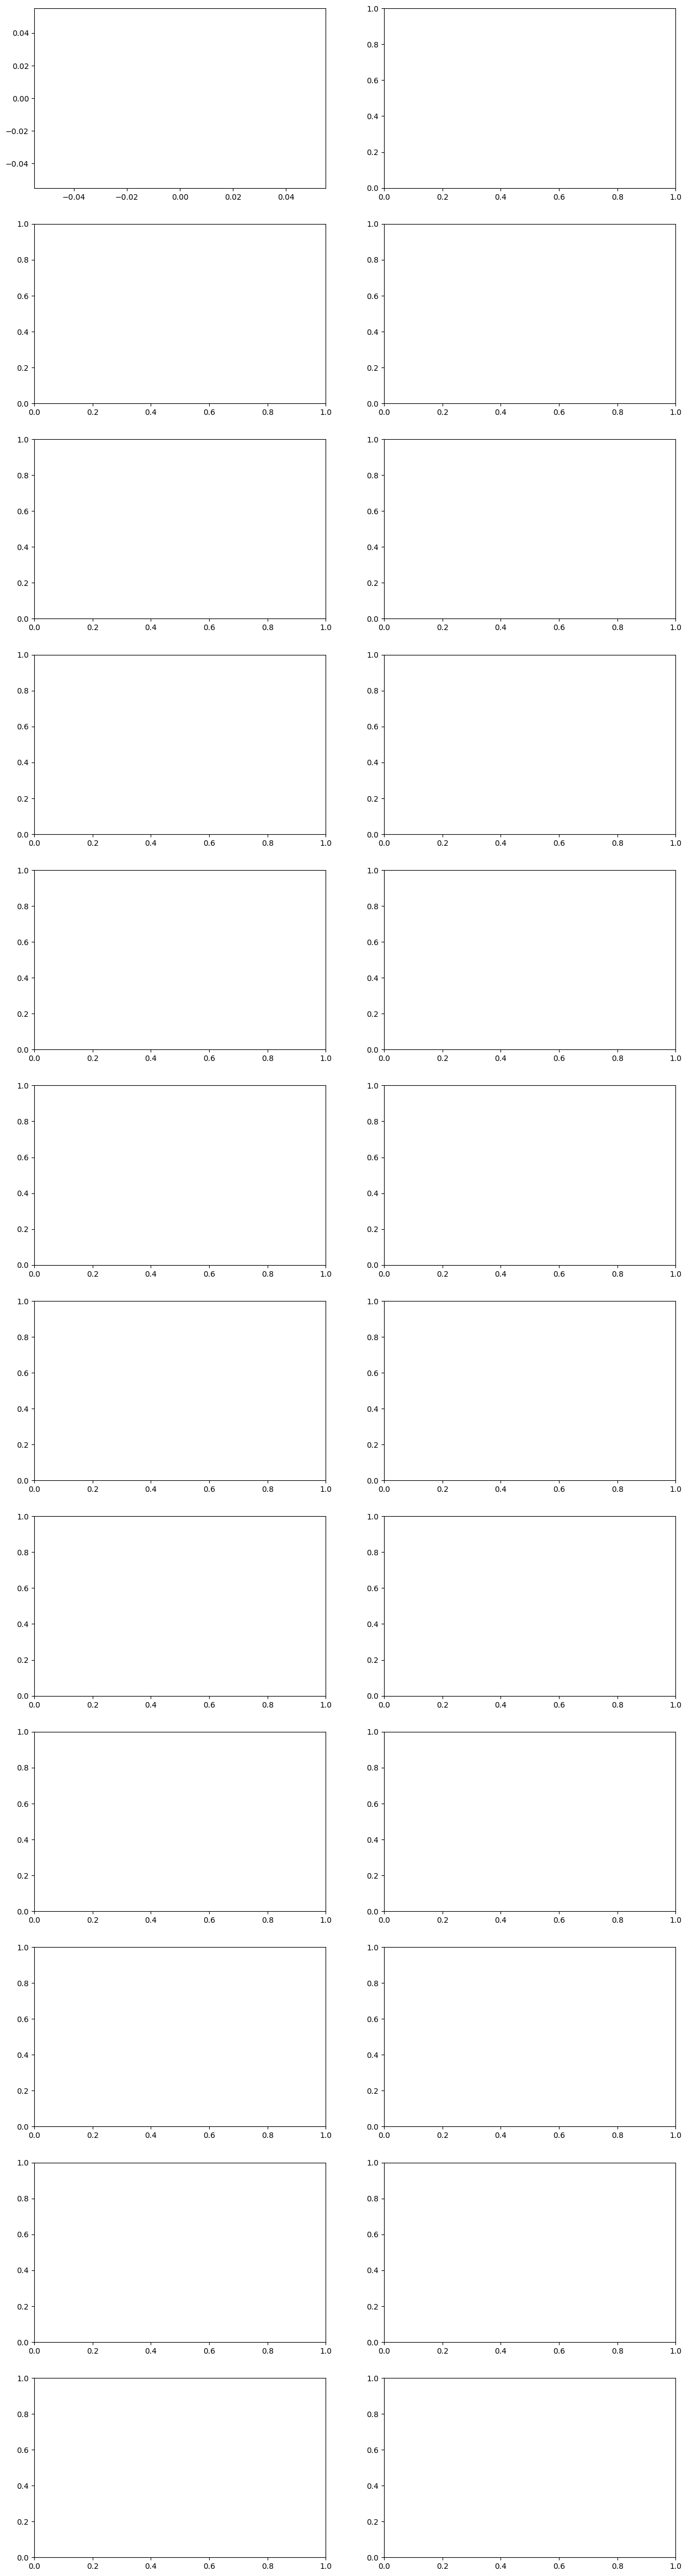

In [ ]:
# num_plot_dist(data , num_cols)

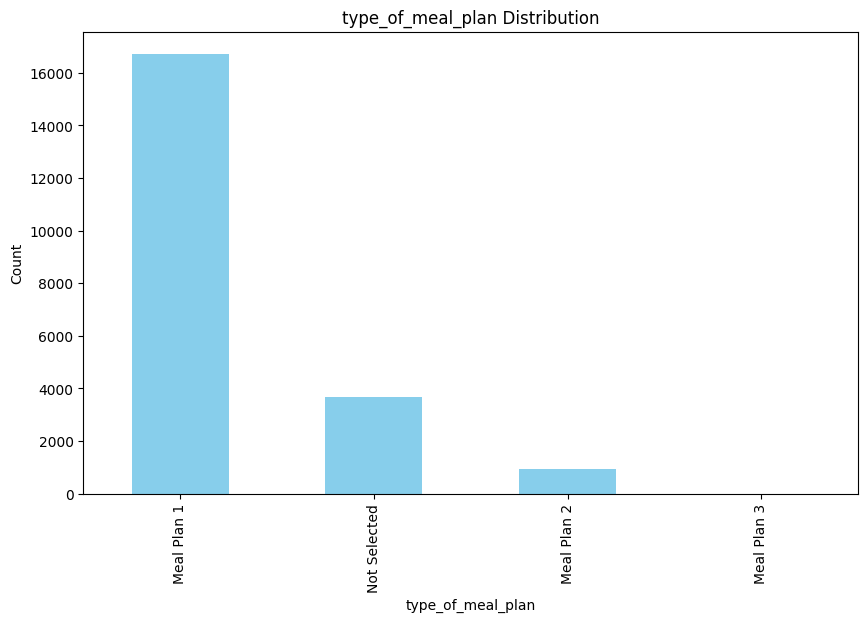

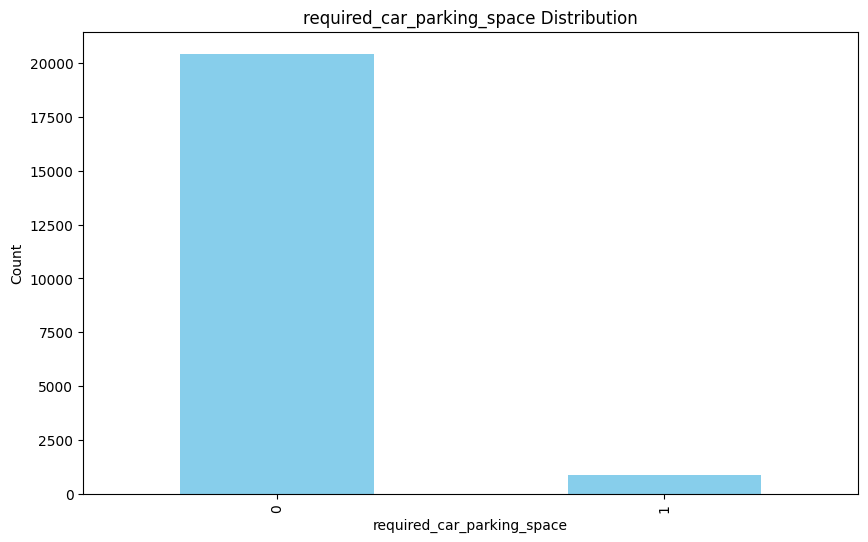

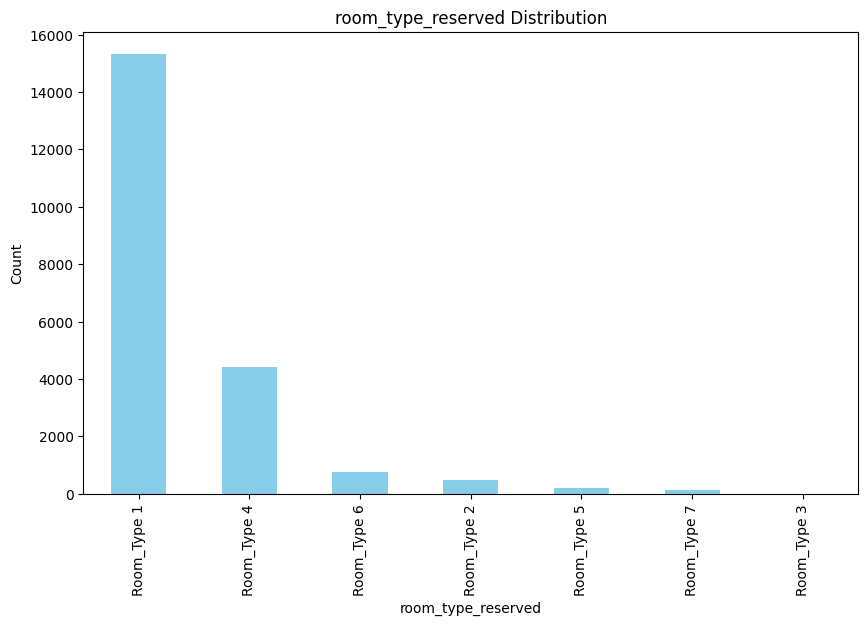

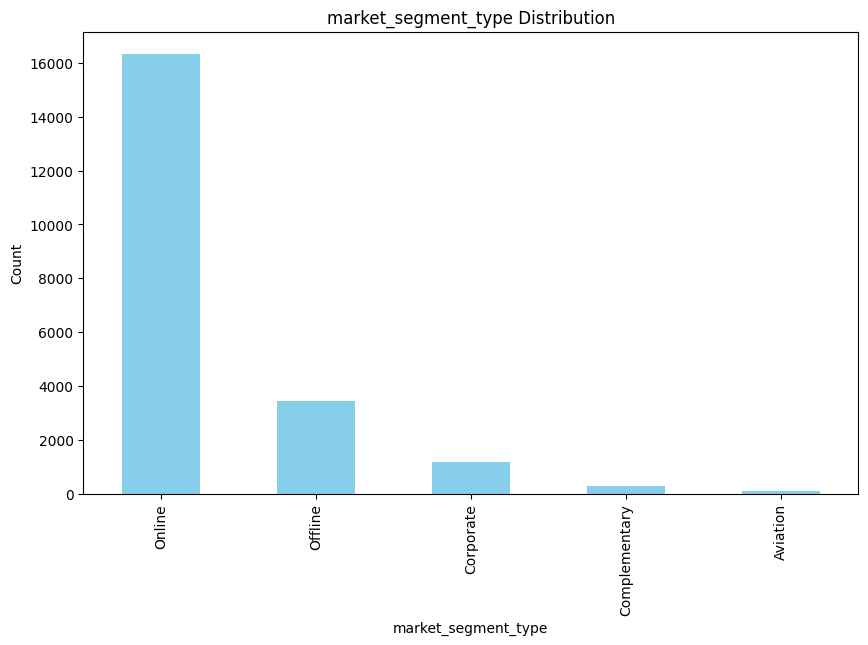

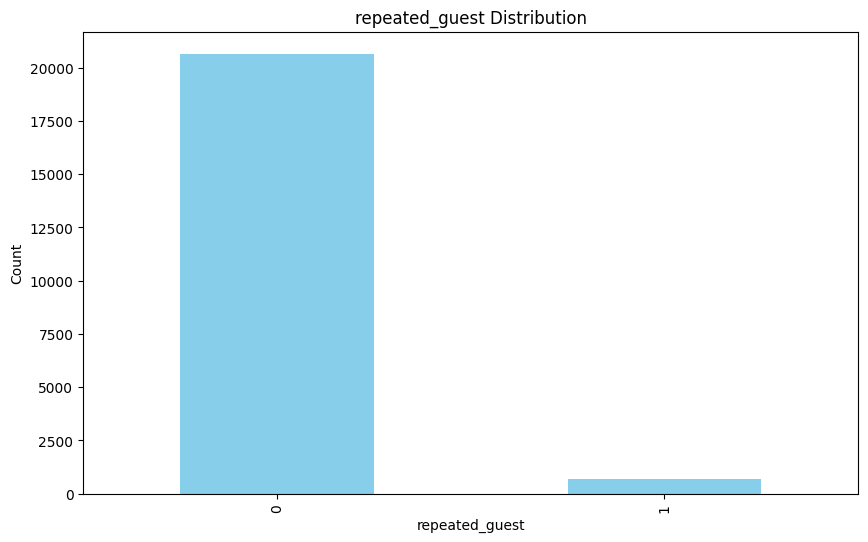

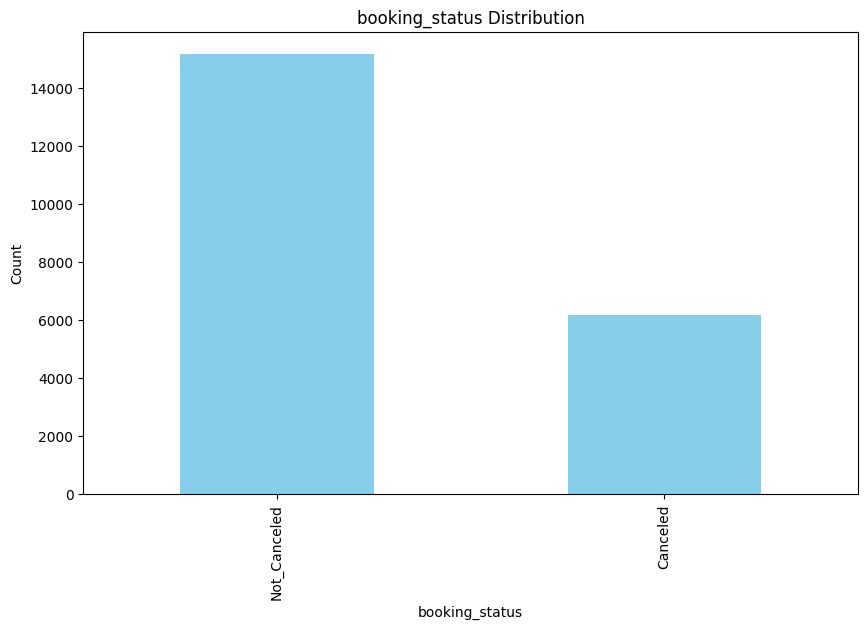

In [22]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar' , color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

#### Bivaraite Analysis

In [23]:
def plot_bivariate_num(df , target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()

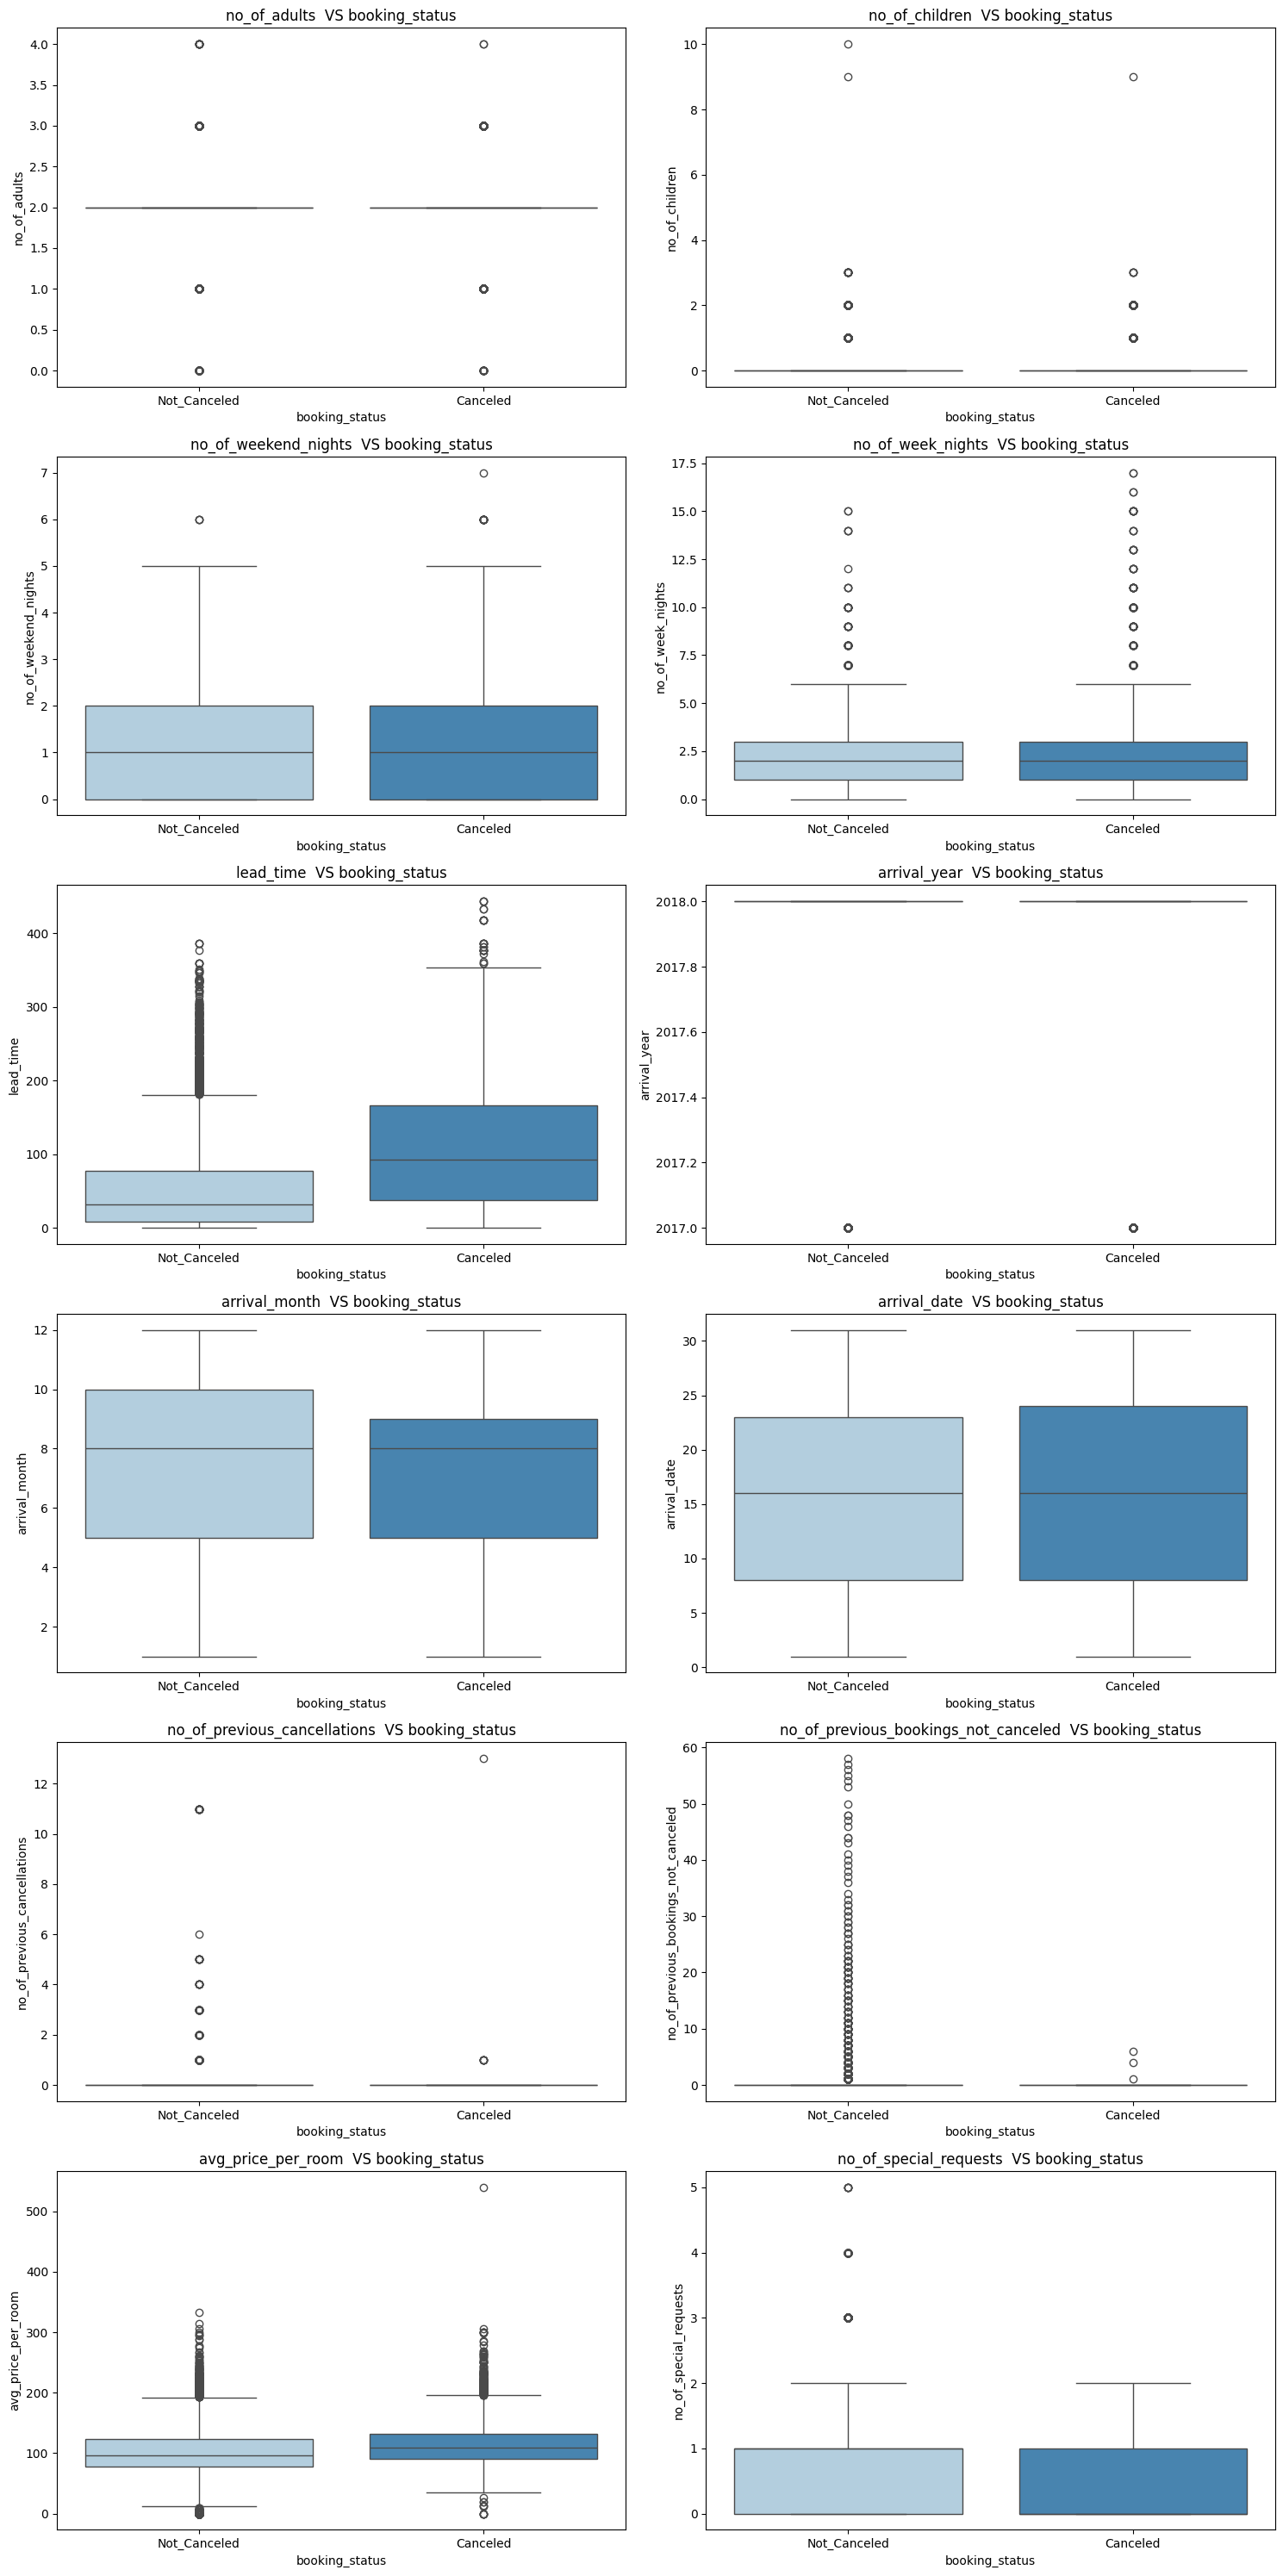

In [ ]:
plot_bivariate_num(data , 'booking_status' , num_cols)

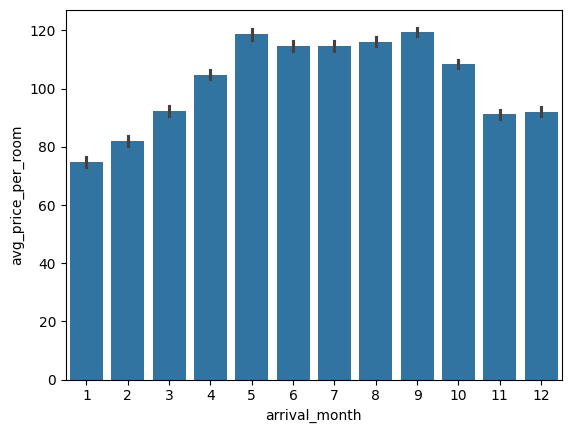

In [ ]:
sns.barplot(x='arrival_month' , y="avg_price_per_room" , data=data)
plt.show()

In [ ]:
def plot_bivaraite_cat(df , target , cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target ,data=df , palette="Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation=90)

    plt.tight_layout()
    plt.show()

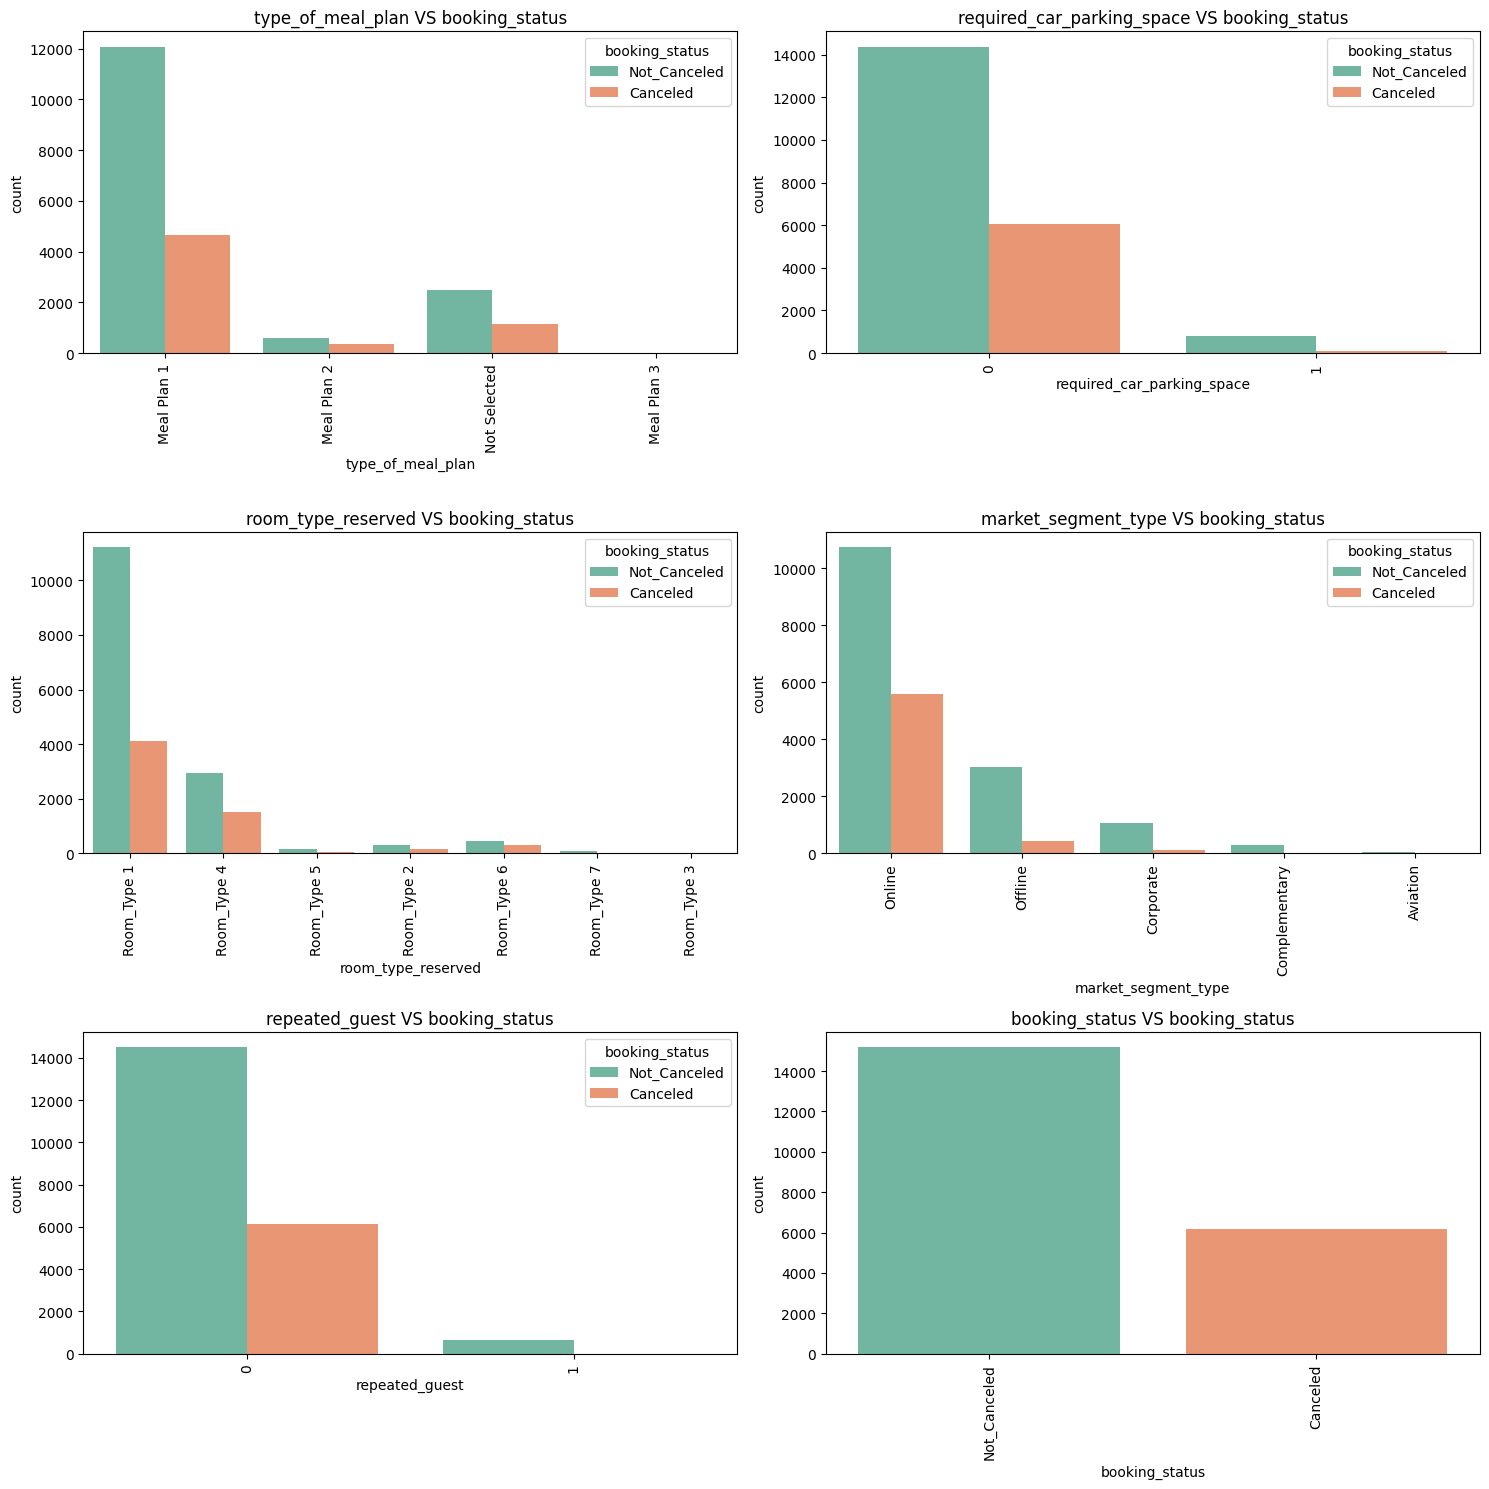

In [ ]:
plot_bivaraite_cat(data , 'booking_status' , cat_cols)

#### DATA PROCESSING

In [24]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,1,0,Meal Plan 1,0,Room_Type 1,3,2017,8,23,Online,0,0,0,90.00,3,Not_Canceled
1,2,0,1,2,Meal Plan 1,0,Room_Type 4,9,2018,2,12,Offline,0,0,0,48.67,0,Not_Canceled
2,2,0,2,2,Meal Plan 1,0,Room_Type 1,24,2018,12,25,Online,0,0,0,95.20,1,Not_Canceled
3,2,0,0,3,Meal Plan 1,0,Room_Type 1,23,2018,6,21,Online,0,0,0,127.67,0,Canceled
4,2,1,0,2,Meal Plan 1,0,Room_Type 4,9,2018,9,8,Online,0,0,0,201.50,2,Not_Canceled


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30350 entries, 0 to 30349
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lead_time               30350 non-null  int64  
 1   no_of_special_requests  30350 non-null  int64  
 2   avg_price_per_room      30350 non-null  float64
 3   arrival_month           30350 non-null  int64  
 4   arrival_date            30350 non-null  int64  
 5   market_segment_type     30350 non-null  int32  
 6   no_of_week_nights       30350 non-null  int64  
 7   no_of_weekend_nights    30350 non-null  int64  
 8   type_of_meal_plan       30350 non-null  int32  
 9   room_type_reserved      30350 non-null  int32  
 10  booking_status          30350 non-null  int32  
dtypes: float64(1), int32(4), int64(6)
memory usage: 2.1 MB


In [105]:
##### Label encoding
from sklearn.preprocessing import LabelEncoder

In [106]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label,code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}
    

KeyError: 'required_car_parking_space'

In [ ]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': 0,
  'Meal Plan 2': 1,
  'Meal Plan 3': 2,
  'Not Selected': 3},
 'required_car_parking_space': {0: 0, 1: 1},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6},
 'market_segment_type': {'Aviation': 0,
  'Complementary': 1,
  'Corporate': 2,
  'Offline': 3,
  'Online': 4},
 'repeated_guest': {0: 0, 1: 1},
 'booking_status': {'Canceled': 0, 'Not_Canceled': 1}}

In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,1,0,0,0,0,3,2017,8,23,4,0,0,0,90.00,3,1
1,2,0,1,2,0,0,3,9,2018,2,12,3,0,0,0,48.67,0,1
2,2,0,2,2,0,0,0,24,2018,12,25,4,0,0,0,95.20,1,1
3,2,0,0,3,0,0,0,23,2018,6,21,4,0,0,0,127.67,0,0
4,2,1,0,2,0,0,3,9,2018,9,8,4,0,0,0,201.50,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21328 entries, 0 to 29018
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21328 non-null  int64  
 1   no_of_children                        21328 non-null  int64  
 2   no_of_weekend_nights                  21328 non-null  int64  
 3   no_of_week_nights                     21328 non-null  int64  
 4   type_of_meal_plan                     21328 non-null  int32  
 5   required_car_parking_space            21328 non-null  int64  
 6   room_type_reserved                    21328 non-null  int32  
 7   lead_time                             21328 non-null  int64  
 8   arrival_year                          21328 non-null  int64  
 9   arrival_month                         21328 non-null  int64  
 10  arrival_date                          21328 non-null  int64  
 11  market_segment_type 

In [ ]:
### Multicollinearity

In [33]:
!pip install statsmodels

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 3.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.9 MB 3.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.9 MB 2.8 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.9 MB 2.1 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/9.9 MB 2.3 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/9.9 MB 2.4 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/9.9 MB 2.2 MB/s eta 0:00:04
   ------------- -------------------------- 3.4/9.9 MB 2.2 MB/s eta 0:00:03
   --------------- ------------------------ 3.9/9.9 MB 2.1 MB/s eta 0:00:03
   ------------------ --------------------- 4.5/9.9 MB 2.1 MB/s eta 0:00:03
   -------------------- ------------------- 5.0/9.9 MB 2.2 MB/s eta 0:00:03
   ---------------------- ---

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [35]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [36]:
vif_data

,feature,VIF
0,const,4.062951e+07
1,no_of_adults,1.334935e+00
2,no_of_children,1.278657e+00
3,no_of_weekend_nights,1.080022e+00
4,no_of_week_nights,1.134511e+00
5,type_of_meal_plan,1.179220e+00
6,required_car_parking_space,1.033016e+00
7,room_type_reserved,1.568520e+00
8,lead_time,1.411580e+00
9,arrival_year,1.288129e+00


#### Our data dont have any multicollinearity

In [37]:
corr = df.corr()

In [38]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.041710,0.090604,0.114990,-0.011542,-0.006018,0.278548,0.157492,0.096062,0.011704,0.024228,0.308165,-0.239027,-0.061310,-0.144040,0.326440,0.154417,-0.096321
no_of_children,-0.041710,1.000000,0.013753,0.012468,-0.104654,0.018526,0.361803,0.006721,0.031737,0.004597,0.022043,0.094068,-0.048034,-0.020327,-0.028981,0.347173,0.098674,-0.061757
no_of_weekend_nights,0.090604,0.013753,1.000000,0.239738,-0.038150,-0.052350,0.031190,0.132834,0.033514,0.012029,0.008311,0.090771,-0.090570,-0.031993,-0.041367,-0.000636,0.017331,-0.074910
no_of_week_nights,0.114990,0.012468,0.239738,1.000000,-0.080651,-0.061138,0.082825,0.220639,0.014098,0.036409,-0.008005,0.115724,-0.117863,-0.032646,-0.057149,0.013326,0.031074,-0.126320
type_of_meal_plan,-0.011542,-0.104654,-0.038150,-0.080651,1.000000,-0.022864,-0.249226,-0.052759,0.094857,0.010581,-0.008743,0.181239,-0.069497,-0.005792,-0.044685,-0.105252,-0.011751,-0.035032
required_car_parking_space,-0.006018,0.018526,-0.052350,-0.061138,-0.022864,1.000000,0.012618,-0.040155,0.005087,-0.009760,-0.005948,-0.045267,0.116547,0.035135,0.069553,0.051270,0.064521,0.085267
room_type_reserved,0.278548,0.361803,0.031190,0.082825,-0.249226,0.012618,1.000000,-0.017083,0.086462,0.001578,0.031492,0.091701,-0.048362,-0.013294,-0.021264,0.493981,0.091643,-0.072369
lead_time,0.157492,0.006721,0.132834,0.220639,-0.052759,-0.040155,-0.017083,1.000000,0.172457,0.139761,0.041915,0.141445,-0.147254,-0.052111,-0.086546,-0.042384,-0.008697,-0.371497
arrival_year,0.096062,0.031737,0.033514,0.014098,0.094857,0.005087,0.086462,0.172457,1.000000,-0.321637,0.018116,0.109662,-0.009603,0.009997,0.025048,0.171045,-0.002675,-0.155543
arrival_month,0.011704,0.004597,0.012029,0.036409,0.010581,-0.009760,0.001578,0.139761,-0.321637,1.000000,-0.017438,-0.016483,-0.010742,-0.046978,-0.011322,0.064291,0.131200,0.009815


<Axes: >

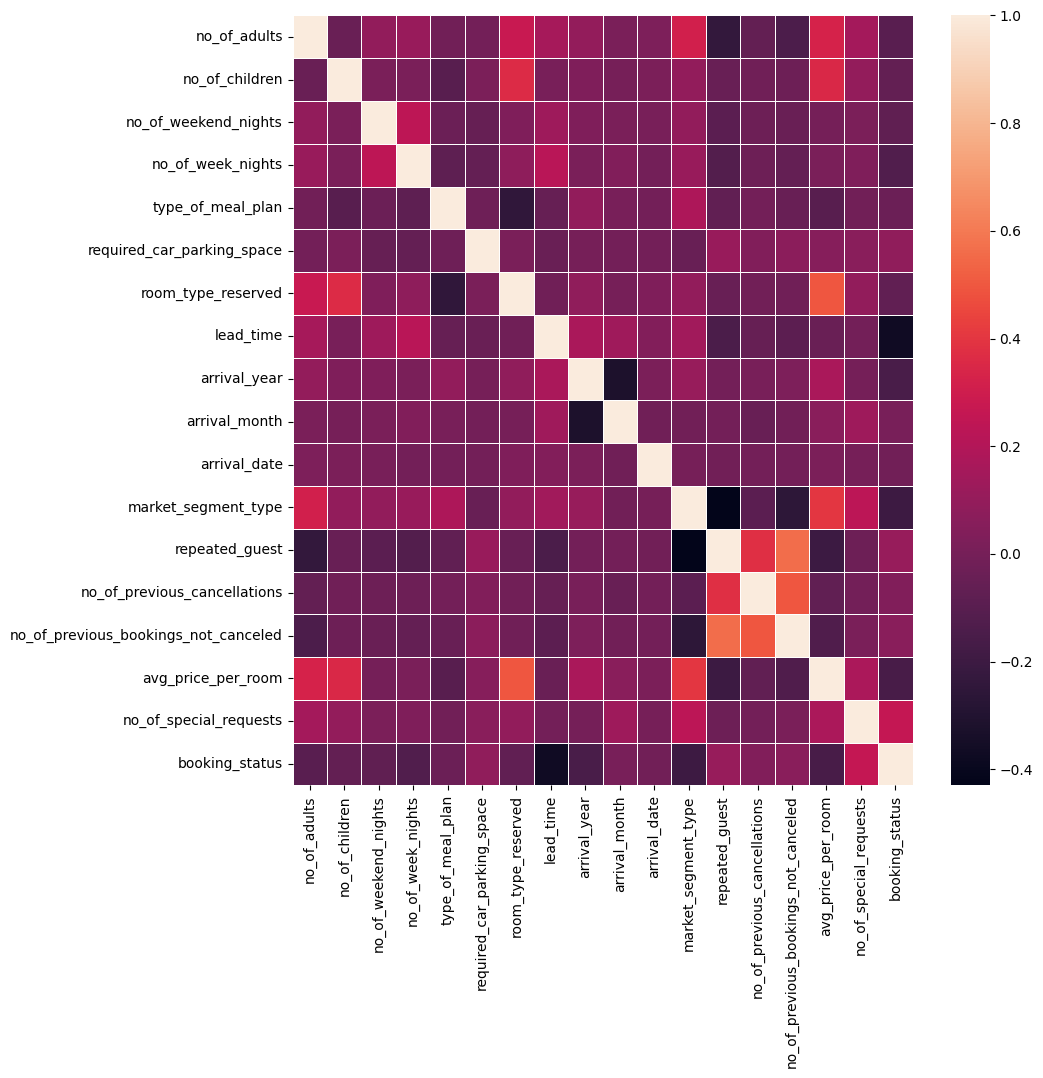

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(corr , linewidths=0.5)

In [40]:
#### Skewness

In [41]:
skewness  = df.skew()

In [42]:
skewness

no_of_adults                            -0.269723
no_of_children                           4.212876
no_of_weekend_nights                     0.690413
no_of_week_nights                        1.655814
type_of_meal_plan                        1.638384
required_car_parking_space               4.598445
room_type_reserved                       1.378971
lead_time                                1.401160
arrival_year                            -1.935633
arrival_month                           -0.295472
arrival_date                             0.016098
market_segment_type                     -2.359013
repeated_guest                           5.342330
no_of_previous_cancellations            22.323003
no_of_previous_bookings_not_canceled    16.224288
avg_price_per_room                       0.593184
no_of_special_requests                   0.921220
booking_status                          -0.933739
dtype: float64

In [43]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [44]:
#### Imablanced Data

In [45]:
df["booking_status"].value_counts()

booking_status
1    15175
0     6153
Name: count, dtype: int64

In [46]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [47]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [48]:
# !pip install imbalanced-learn


In [49]:
y.value_counts()

booking_status
1    15175
0     6153
Name: count, dtype: int64

In [50]:
from imblearn.over_sampling import SMOTE


In [51]:
smote = SMOTE(random_state=42)

X_res , y_res = smote.fit_resample(X,y)

In [52]:
y_res

0        1
1        1
2        1
3        0
4        1
        ..
30345    0
30346    0
30347    0
30348    0
30349    0
Name: booking_status, Length: 30350, dtype: int32

In [53]:
y_res.value_counts()

booking_status
1    15175
0    15175
Name: count, dtype: int64

In [54]:
balanced_df = pd.DataFrame(X_res , columns=X.columns)
balanced_df["booking_status"] = y_res

In [55]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,1,0,0,0,0,3,2017,8,23,4,0.0,0.0,0.0,90.00,3,1
1,2,0,1,2,0,0,3,9,2018,2,12,3,0.0,0.0,0.0,48.67,0,1
2,2,0,2,2,0,0,0,24,2018,12,25,4,0.0,0.0,0.0,95.20,1,1
3,2,0,0,3,0,0,0,23,2018,6,21,4,0.0,0.0,0.0,127.67,0,0
4,2,1,0,2,0,0,3,9,2018,9,8,4,0.0,0.0,0.0,201.50,2,1


In [56]:
balanced_df.shape

(30350, 18)

In [57]:
df = balanced_df.copy()

In [58]:
df.shape

(30350, 18)

In [59]:
#### Feature Selection

In [60]:
len(df.columns)

18

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [63]:
model =  RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [64]:
feature_importance = model.feature_importances_

In [65]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

In [66]:
top_features_importance_df = feature_importance_df.sort_values(by="importance" , ascending=False)

In [67]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [68]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,3,3,90.00,8,23,4,0,1,0,0,1
1,9,0,48.67,2,12,3,2,1,0,3,1
2,24,1,95.20,12,25,4,2,2,0,0,1
3,23,0,127.67,6,21,4,3,0,0,0,0
4,9,2,201.50,9,8,4,2,0,0,3,1


In [69]:
len(top_10_df.columns)

11

In [70]:
df = top_10_df.copy()

### MODEL SELECTION

In [71]:
!pip install xgboost lightgbm

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 3.1 MB/s eta 0:00:48
   ---------------------------------------- 1.8/150.0 MB 3.2 MB/s eta 0:00:46
    --------------------------------------- 2.4/150.0 MB 3.3 MB/s eta 0:00:46
    --------------------------------------- 3.1/150.0 MB 3.1 MB/s eta 0:00:47
   - -------------------------------------- 3.9/150.0 MB 3.2 MB/s eta 0:00:46
   - -------------------------------------- 4.7/150.0 MB 3.3 MB/s eta 0:00:45
   - -------------------------------------- 5.5/150.0 MB 3.4 MB/s eta 0:00:43
   - -------------------------------------- 6.3/150.0 MB 3.4 MB/s eta 0:00:43
   - -------------------------------------- 7.1/150.0 MB 3.4 MB/s eta 0:00:42
   -- ------------------------------------- 7.6/150.0 MB 3.4 MB/s eta 0:00:43
   -- ------------------------------------- 8.4/150.0 MB 3.4 MB/s eta 0:00:42


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [73]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [74]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [75]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

In [76]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [77]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)


[LightGBM] [Info] Number of positive: 12158, number of negative: 12122
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 24280, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500741 -> initscore=0.002965
[LightGBM] [Info] Start training from score 0.002965


In [78]:
metrics_df= pd.DataFrame(metrics)

In [79]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.881219,0.873455,0.889957,0.881629
1,LogisticRegression,0.792916,0.804498,0.770633,0.787202
2,Gradient Boosting,0.828501,0.810302,0.855154,0.832124
3,Suuport vector classifier,0.723723,0.727273,0.710640,0.718860
4,Decsion Tree,0.841680,0.842210,0.838581,0.840392
5,KNN,0.774465,0.839654,0.675174,0.748484
6,Naive Bayes,0.772817,0.796524,0.729201,0.761377
7,XGboost,0.866392,0.859049,0.874710,0.866809
8,Adaboost,0.822076,0.810317,0.838250,0.824047
9,LGBM,0.857166,0.844551,0.873384,0.858726


In [80]:
##### TRAIN OUR RF MODEL

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [82]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [83]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [84]:
rf = RandomForestClassifier(random_state=42)

In [85]:
params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False] 
}

In [86]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [87]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.5s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  11.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  11.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  11.3s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002E0E17E8710>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002E0E17946D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002E0DA297810>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002E0E17DB5D0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [88]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [89]:
best_rf_model = random_search.best_estimator_

In [90]:
y_pred = best_rf_model.predict(X_test)

In [91]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [92]:
accuracy

0.8797364085667215

In [93]:
precision

0.8687520154788778

In [94]:
recall

0.8929400066291018

In [95]:
f1

0.880679960771494

In [96]:
### Save this model

In [97]:
import joblib

In [98]:
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [99]:
loaded_model=joblib.load("random_forest.pkl")

In [100]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
27520,19,0,79.0,2,23,4,3,0,3,0


In [101]:
new_data = np.array([190,1 ,	93.5,	9	,8,	4,	5,	2,	0,	0]).reshape(1,-1)

In [102]:
predictions=loaded_model.predict(new_data)

In [103]:
predictions

array([1])